In [1]:
import cv2
import numpy as np 
from skimage.util import img_as_float
from skimage import io
from matplotlib import pyplot as plt
from skimage.filters.rank import otsu
from skimage.morphology import disk

In [2]:
img_path = 'cover50.jpg'
cv2_img = cv2.imread(img_path)
img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

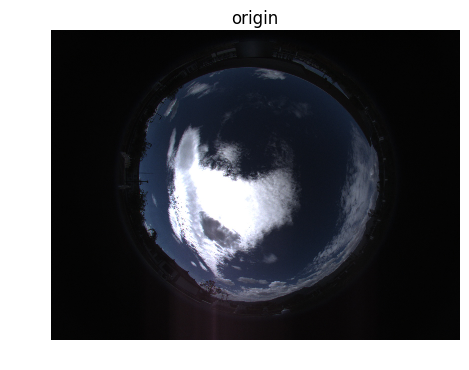

In [3]:
plt.imshow(img)
plt.title('origin')
plt.axis("off")
plt.show()

In [4]:
imgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

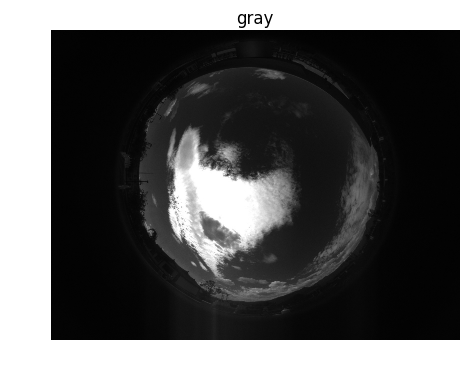

In [6]:
plt.imshow(imgray, cmap='gray')
plt.title('gray')
plt.axis("off")
plt.show()

In [10]:
# T, res = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [23]:
edges = cv2.Canny(imgray, 30, 80)

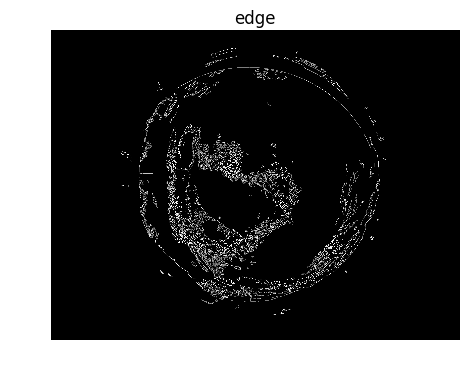

In [24]:
plt.imshow(edges, cmap='gray')
plt.title('edge')
plt.axis("off")
plt.show()

In [87]:
ret, thresh = cv2.threshold(imgray, 30, 255, 0)

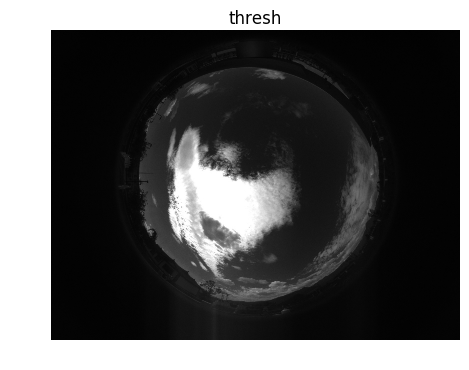

In [120]:
plt.imshow(imgray, cmap='gray')
plt.title('thresh')
plt.axis("off")
plt.show()

In [121]:
hist = cv2.calcHist([imgray],[0],None,[256],[0,256])

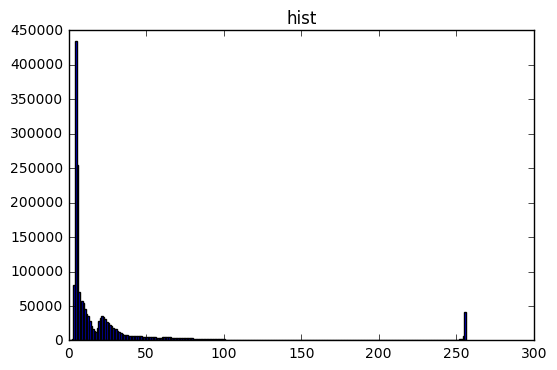

In [125]:
plt.hist(imgray.ravel(), 256, [0, 256])
plt.title('hist')
plt.show()

In [132]:
T, res = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [144]:
cotlist = np.zeros((256))

In [149]:
for i in imgray.ravel():
    cotlist[i] += 1

In [158]:
max_px = cotlist.argmax()

In [155]:
cotlist.argsort()[-10:][::-1]

array([  4,   5,   3,   6,   8,   9,  10,   7, 255,  11], dtype=int64)

In [156]:
row, col = imgray.shape[0], imgray.shape[1]

In [160]:
for i in range(row):
    for j in range(col):
        if imgray[i][j] > 200:
            imgray[i][j] = max_px

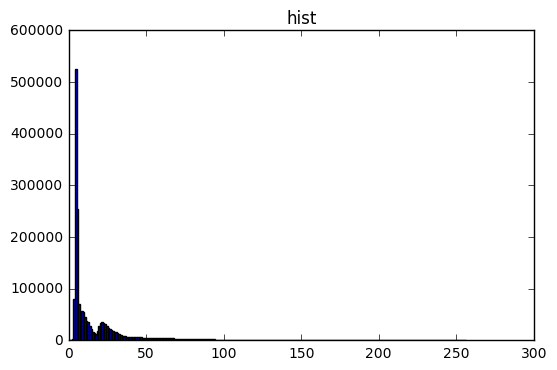

In [161]:
plt.hist(imgray.ravel(), 256, [0, 256])
plt.title('hist')
plt.show()

In [162]:
T, res = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [163]:
T

56.0

In [101]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [116]:
imgx = cv2.drawContours(thresh, contours, -1, (120,120,120), 3)

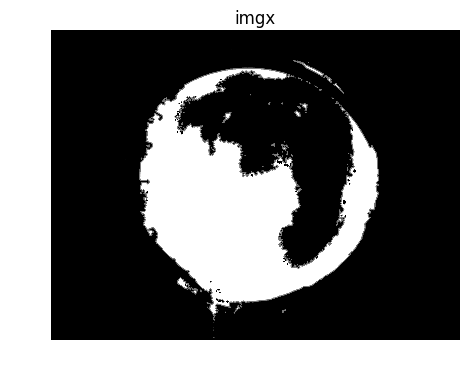

In [119]:
plt.imshow(imgx, cmap='gray')
plt.title('imgx')
plt.axis("off")
plt.show()